Create Neural Network From Scratch

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Membaca dataset
datatrain = pd.read_csv('train.csv')
datatrain.head(5)

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,0
3,710,3.7,5,1
4,680,3.9,4,0


In [3]:
# Ubah data menjadi array
X = datatrain[['gmat', 'gpa', 'work_experience','admitted']]
X = np.array(X)

X[:5]

array([[780. ,   4. ,   3. ,   1. ],
       [750. ,   3.9,   4. ,   1. ],
       [690. ,   3.3,   3. ,   0. ],
       [710. ,   3.7,   5. ,   1. ],
       [680. ,   3.9,   4. ,   0. ]])

In [4]:
# Membuat class func Neural Network
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Inisialisasi bobot dengan nilai random
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)

        # Inisialisasi bias dengan nilai random
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        # Fungsi aktivasi sigmoid
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Turunan dari fungsi sigmoid
        return x * (1 - x)

    def forward(self, inputs):
        # Proses feedforward
        self.hidden_sum = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self.sigmoid(self.hidden_sum)

        self.output_sum = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.predicted_output = self.sigmoid(self.output_sum)

        return self.predicted_output

    def backward(self, inputs, target, learning_rate):
        # Menghitung error
        output_error = target - self.predicted_output
        output_delta = output_error * self.sigmoid_derivative(self.predicted_output)

        # Menghitung error pada hidden layer
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_output)

        # Memperbarui bobot dan bias
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += inputs.T.dot(hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, inputs, targets, epochs, learning_rate):
        for epoch in range(epochs):
            for i in range(len(inputs)):
                input_data = inputs[i:i+1]
                target = targets[i:i+1]

                # Proses feedforward dan backpropagation
                self.forward(input_data)
                self.backward(input_data, target, learning_rate)

                # Menghitung total error pada setiap epoch
                total_error = np.mean(np.abs(target - self.predicted_output))
            
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Error: {total_error}')

In [5]:
# Normalisasi data 
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
normalized_data = (X - mean) / std

# Split fitur dan target
inputs = normalized_data[:, :-1]
targets = normalized_data[:, -1:]

# Inisialisasi dan NN
input_size = inputs.shape[1]
hidden_size = 3
output_size = 1

nn = NeuralNetwork(input_size, hidden_size, output_size)
nn.train(inputs, targets, epochs=1000, learning_rate=0.1)

Epoch 0, Error: 0.9498856976640699
Epoch 100, Error: 0.18038094937108795
Epoch 200, Error: 0.14834713543732814
Epoch 300, Error: 0.146088995329689
Epoch 400, Error: 0.142340990989553
Epoch 500, Error: 0.13361167062821888
Epoch 600, Error: 0.12715184918034417
Epoch 700, Error: 0.12223397184870533
Epoch 800, Error: 0.11834616495945283
Epoch 900, Error: 0.11528657255579478


In [6]:
# Data baru
new_data = np.array([
    [590, 2, 3],
    [740, 3.7, 4],
    [680, 3.3, 6],
    [610, 2.3, 1],
    [710, 3, 5]
])

threshold = 0.5

# Normalisasi data baru
normalized_new_data = (new_data - mean[:-1]) / std[:-1]
predicted_outputs_new = nn.forward(normalized_new_data)
predicted_classes_new = (predicted_outputs_new > threshold).astype(int)

# Menampilkan hasil prediksi
print("Predicted Admission for New Data:")
for i in range(len(new_data)):
    print(f"Predict admitted {i + 1}: {predicted_classes_new[i]}")

Predicted Admission for New Data:
Predict admitted 1: [0]
Predict admitted 2: [1]
Predict admitted 3: [1]
Predict admitted 4: [0]
Predict admitted 5: [1]


In [7]:
new_data_with_predictions = np.hstack((new_data, predicted_classes_new.reshape(-1, 1)))

# Membuat DataFrame dari data baru dan hasil prediksi
columns = ["gmat", "gpa", "work_experience", "admitted_prediction"]
data_test = pd.DataFrame(new_data_with_predictions, columns=columns)

# Menyimpan DataFrame ke dalam file CSV
data_test.to_csv("test.csv", index=False)
print(data_test)

    gmat  gpa  work_experience  admitted_prediction
0  590.0  2.0              3.0                  0.0
1  740.0  3.7              4.0                  1.0
2  680.0  3.3              6.0                  1.0
3  610.0  2.3              1.0                  0.0
4  710.0  3.0              5.0                  1.0


Visualisasi dengan bantuan sklearn 

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ambil NN terlatih pada data yang dinormalisasi
predictions = np.round(nn.forward(inputs))

# Ubah target menjadi nilai biner (0 atau 1)
binary_targets = (targets > 0.5).astype(int)

# Membuat confusion matrix
conf_matrix = confusion_matrix(binary_targets, predictions)

# Hasil akurasi 
accuracy = np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix)

print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")

c:\Minicoda_3\envs\jcopml\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Confusion Matrix:
[[21  1]
 [ 1 17]]
Accuracy: 0.95


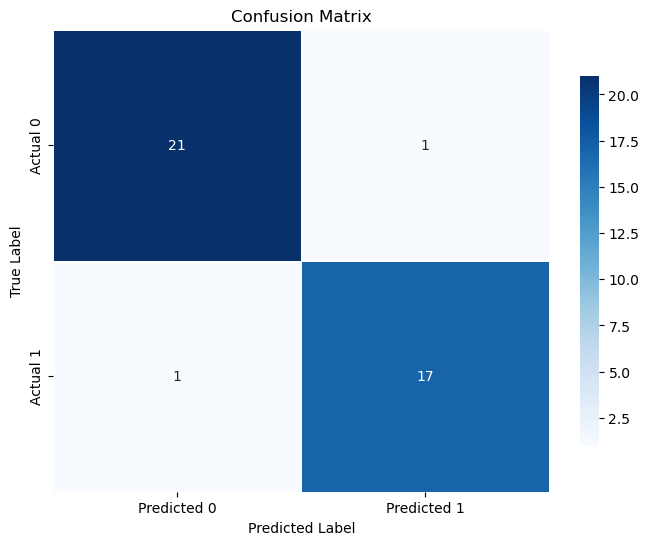

In [9]:
# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar_kws={"shrink": 0.8}, 
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()